In [ ]:
import h5py
import numpy as np

# Load dataset
def load_dataset():
  '''
  Load the dataset into train and test set

  Arguments:
  None

  Returns:
  train_x -- training set data
  train_y -- training set label
  test_x -- test set data
  test_y -- test set label
  '''

  train_dataset = h5py.File('datasets/train_signs.h5', 'r')
  train_x, train_y = np.array(train_dataset['train_set_x']), np.array(train_dataset['train_set_y'])

  test_dataset = h5py.File('datasets/test_signs.h5', 'r')
  test_x, test_y = np.array(test_dataset['test_set_x']), np.array(test_dataset['test_set_y'])

  classes = np.array(test_dataset['list_classes'])

  return train_x, train_y, test_x, test_y, classes

In [ ]:
train_x, train_y, test_x, test_y, classes = load_dataset()

y = 4


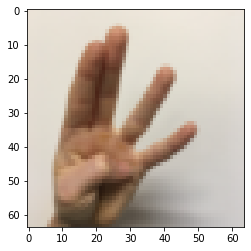

In [ ]:
import matplotlib.pyplot as plt

# Visualize an example
idx = 9
plt.imshow(train_x[idx])

# Print the label
y = train_y[idx]
print(f'y = {y}')

In [ ]:
# Normalize data
train_x = train_x / 255.
test_x = test_x / 255.

### The labels y should be converted to one-hot vectors for easier computation later (when using 'softmax') </br>

<img src="SIGNS.png" style="width:800px;height:300px;">

In [ ]:
def convert_to_one_hot(scalar, num_classes):
  '''
  Convert a scalar to an one-hot vector

  Arguments:
  scalar -- the scalar needs to be converted
  num_classes -- the number of classes for converting to one-hot

  Returns:
  one_hot -- the converted one-hot column vector
  '''
  one_hot = np.eye(num_classes)[scalar.reshape(-1)].T
  return one_hot

In [ ]:
import tensorflow as tf

# Convert the labels to one-hot vectors
num_classes = len(classes)                                     # There are 6 classes in this dataset
train_y = convert_to_one_hot(train_y, num_classes).T
test_y = convert_to_one_hot(test_y, num_classes).T

In [ ]:
# Inspect the shapes of data
print(f'train_x shape: {train_x.shape}')
print(f'train_y shape: {train_y.shape}')
print(f'test_x shape: {test_x.shape}')
print(f'test_y shape: {test_y.shape}')

train_x shape: (1080, 64, 64, 3)
train_y shape: (1080, 6)
test_x shape: (120, 64, 64, 3)
test_y shape: (120, 6)


In [ ]:
import tensorflow.keras.layers as tfl

def CNN(input_shape):
  '''
  Implements the forward propagation for the model:
  Conv2D -> ReLU -> MaxPooling2D -> Conv2D -> ReLU -> MaxPooling2D -> Flatten -> Dense

  Arguments:
  input_shape -- the shape of input data

  Returns:
  model -- TF Keras Model
  '''

  inputs = tf.keras.Input(shape=input_shape)                                               # The input node
  Z1 = tfl.Conv2D(filters=8, kernel_size=(4,4), strides=(1,1), padding='same')(inputs)     # 1st convolutional layer
  A1 = tfl.ReLU()(Z1)
  P1 = tfl.MaxPooling2D(pool_size=(8,8), strides=(8,8), padding='same')(A1)               # 1st max pooling layer
  Z2 = tfl.Conv2D(filters=16, kernel_size=(4,4), strides=(1,1), padding='same')(P1)       # 2nd convolutional layer
  A2 = tfl.ReLU()(Z2)
  P2 = tfl.MaxPooling2D(pool_size=(4,4), strides=(4,4), padding='same')(A2)               # 2nd max pooling layer
  F = tfl.Flatten()(P2)                                                                   # Flatten the image before feeding to fully connected network
  outputs = tfl.Dense(units=num_classes, activation='softmax')(F)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  
  return model

In [ ]:
# Initialize model
input_shape = (train_x.shape[1], train_x.shape[2], train_x.shape[3])
model = CNN(input_shape)

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(train_x, train_y, epochs=100, batch_size=64)

Epoch 1/100
17/17 [==============================] - 9s 14ms/step - loss: 1.7979 - accuracy: 0.1880
Epoch 2/100
17/17 [==============================] - 0s 9ms/step - loss: 1.7782 - accuracy: 0.2639
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 1.7624 - accuracy: 0.2593
Epoch 4/100
17/17 [==============================] - 0s 9ms/step - loss: 1.7370 - accuracy: 0.3759
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 1.7022 - accuracy: 0.4213
Epoch 6/100
17/17 [==============================] - 0s 9ms/step - loss: 1.6486 - accuracy: 0.4759
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 1.5896 - accuracy: 0.4870
Epoch 8/100
17/17 [==============================] - 0s 9ms/step - loss: 1.5040 - accuracy: 0.5417
Epoch 9/100
17/17 [==============================] - 0s 9ms/step - loss: 1.4192 - accuracy: 0.5685
Epoch 10/100
17/17 [==============================] - 0s 8ms/step - loss: 1.3258 - accuracy: 0.6241
Epoch 11

In [ ]:
# Evaluate model
model.evaluate(test_x, test_y)

4/4 [==============================] - 1s 25ms/step - loss: 0.2570 - accuracy: 0.9000


[0.2569756507873535, 0.8999999761581421]